In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set seaborn style
sns.set() 

# Ejemplo de propagación de incertezas en la suma de dos variables aleatorias con distribución de Poisson

Asumimos que tenemos dos variables aletorias $X$ e $Y$ independientes con distribución de Poisson.

Tomamos $\lambda_X$ y $\lambda_Y$ como las constantes de las distribuciones de ambas variables.

Se tiene que $\mu=\lambda$ y $\sigma=\sqrt{\lambda}$ son la esperanza y el desvío estándar para una distribución de Poisson. 

Se define una nueva variable aleatoria como:

\begin{equation}
Z = X + Y
\end{equation}

y se desea encontrar cuánto es el desvío estándar de $Z$, $\sigma_Z$.

Aplicando la fórmula para propagar incertezas se obtiene:

\begin{equation}
\sigma_Z = \sqrt{ \sigma_X^2 + \sigma_Y^2} = \sqrt{\lambda_X + \lambda_Y}
\end{equation}

Este resultado es compatible con el hecho de que la suma de dos variables aleatorias con distribución de Poisson es también una variable aleatoria con distribuación de Poisson cuya esperanza es $\lambda_X + \lambda_Y$.

***Nota:*** Si en lugar de sumar, se restaran dos variables aleatorias con distribución de Poisson, se obtendría una distribucción de [Skellam](https://en.wikipedia.org/wiki/Skellam_distribution). En este caso, su esperanza sería $\lambda_X - \lambda_Y$ mientras que su desvío estándar sería $\sqrt{\lambda_X + \lambda_Y}$. Es decir, la fórmula de propagación de incertezas también sería exacta.

## Simulación para verificar el resultado (Monte-Carlo)

El resultado teórico puede ser validado mediante una simulaicón de Monte-Carlo. Se muestrean pares de variables aleatorias independientes con distribuciones de Poisson, se las suma y se construye el histograma con la distribución de $Z$. De esta manera se obtiene la distribución de probabilidad de la variable $Z$.

En particular, sólo interesa su desvío estándar, pero es importante recalcar que por este método se obtiene la máxima información posible sobre $Z$ (y no sus primeros momentos).

In [2]:
# Función para graficar hisogramas junto con la distribución normal asociada
#def plot_histogram_with_gaussian(data, mean, std, range_vals, color, label):
def plot_histogram_with_gaussian(data, mean, std, range_vals, color, label):
    """
    Plots a histogram of the data and overlays a Gaussian fit.

    Parameters:
        data (np.array): The data to plot.
        mean (float): The mean of the Gaussian fit.
        std (float): The standard deviation of the Gaussian fit.
        range_vals (list): The range for the histogram and Gaussian fit.
        color (str): The color of the histogram.
        label (str): The label for the histogram.
        title (str): The title of the plot.
        ax (matplotlib.axes.Axes): The axis to plot on.
    """
    fig, ax = plt.subplots()

    mu_data, sig_data = np.mean(data), np.std(data)


    # Plot histogram
    range_vals = [int(v) for v in range_vals]
    
    counts, bins, _ = ax.hist(data, bins=range(*range_vals), density=True, align='left',
                              alpha=0.6, color=color, label=label)

    # Plot Gaussian fit
    x = np.linspace(*range_vals, 1000)
    gaussian_fit = norm.pdf(x, mean, std)
    ax.plot(x, gaussian_fit, 'r-', label='Distribución normal')

    # Add title and labels
    title = f'$\hat\mu$ = {mu_data:.2f}      $\hat\sigma$ = {sig_data:.2f}'
    ax.set_title(title)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend(loc='best')   
    return (fig, ax)

In [3]:
# Parámetros para la simulación
lambda_x = 16  # Constante de la distribución de Poisson de la variable X
lambda_y = 4  # Constante de la distribución de Poisson de la variable Y

mu_x = lambda_x
mu_y = lambda_y
sig_x = np.sqrt(mu_x)  # Standard deviation for the first variable
sig_y = np.sqrt(mu_y)  # Standard deviation for the second variable
num_samples = 10000  # Number of samples to generate     

# Valores teóricos esperados para la variable Z
mu_z_teo = mu_x + mu_y  # Theoretical mean of the sum
std_z_teo = np.sqrt(sig_x**2 + sig_y**2)  # Theoretical standard deviation of the sum
#std_z_teo = np.sqrt(mu_z_teo)
print(f"Esperanza teórica de Z: {mu_z_teo}")
print(f"Desvío estándar de Z: {std_z_teo}")
                                                             

Esperanza teórica de Z: 20
Desvío estándar de Z: 4.47213595499958


In [4]:
# Se simulan las variables con distribución de Poisson
x = np.random.poisson(mu_x, num_samples)
y = np.random.poisson(mu_y, num_samples)

# Se realiza la suma
z = x + y

In [5]:
# Se definen límites para los gráficos
lim = 5  # Number of standard deviations to plot
lim_bin_x = [mu_x - lim * sig_x, mu_x + lim * sig_x]  # Límites para la primer variable
lim_bin_y = [mu_y - lim * sig_y, mu_y + lim * sig_y]  # Límites para la segunda variable
lim_bin_z = [mu_z_teo - lim * std_z_teo, mu_z_teo + lim * std_z_teo]  #  Límites para la suma

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat\\mu$ = 16.06      $\\hat\\sigma$ = 3.99'}, xlabel='Valor', ylabel='Densidad de probabilidad'>)

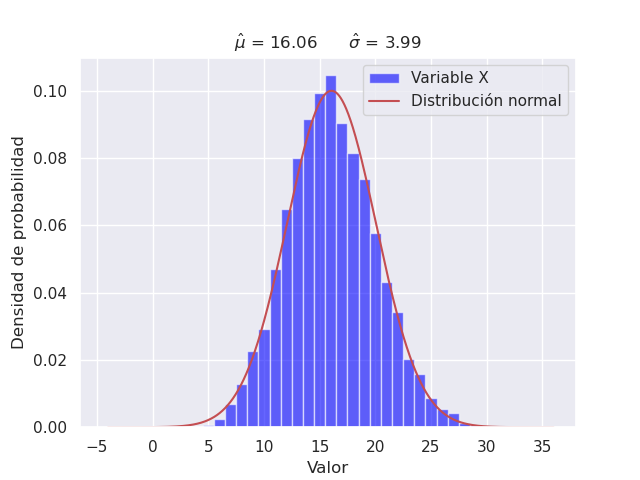

In [6]:
# Calculo el promedio y desvío de los valores simulados para X
mu_x_est, sig_x_est = np.mean(x), np.std(x)

# Plot histograms and Gaussian fits
plot_histogram_with_gaussian(x, mu_x_est, sig_x_est, lim_bin_x, 'blue', 'Variable X')

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat\\mu$ = 3.99      $\\hat\\sigma$ = 1.97'}, xlabel='Valor', ylabel='Densidad de probabilidad'>)

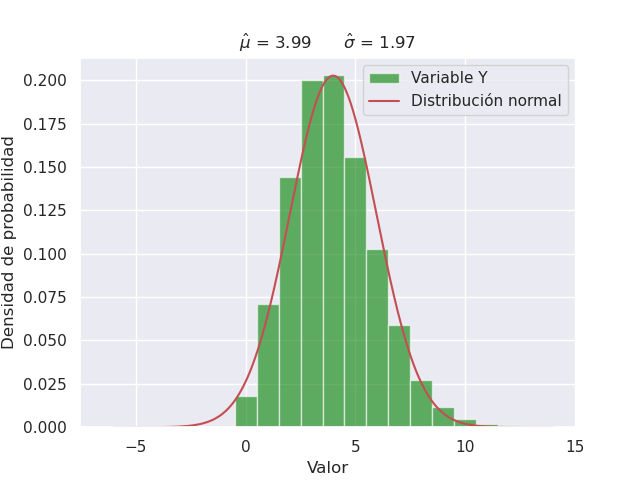

In [7]:
# Calculo el promedio y desvío de los valores simulados para X
mu_y_est, sig_y_est = np.mean(y), np.std(y)

plot_histogram_with_gaussian(y, mu_y_est, sig_y_est, lim_bin_y, 'green', 'Variable Y')

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat\\mu$ = 20.05      $\\hat\\sigma$ = 4.46'}, xlabel='Valor', ylabel='Densidad de probabilidad'>)

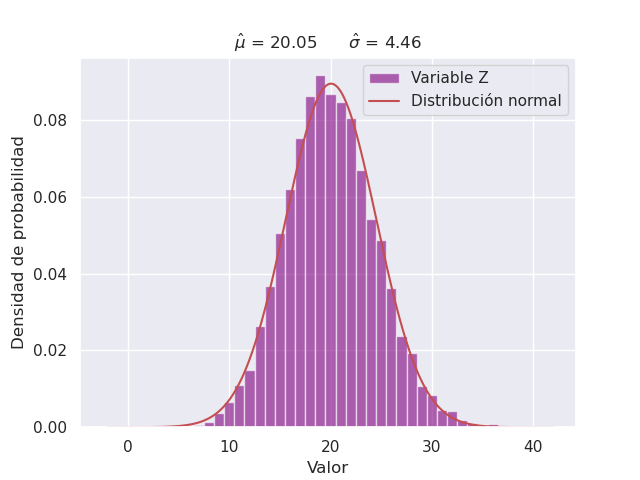

In [8]:
mu_z_est, sig_z_est = np.mean(z), np.std(z)

plot_histogram_with_gaussian(z, mu_z_est, sig_z_est, lim_bin_z, 'purple', 'Variable Z')